Dataset

In [117]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
N = 50
X_pos = np.random.randn(N, 2) + [1.4, 1.4]
X_neg = np.random.randn(N, 2) + [-1.4, -1.4]
X = np.vstack((X_pos, X_neg))
y = np.hstack((np.ones(N), -np.ones(N)))

Visualize the dataset

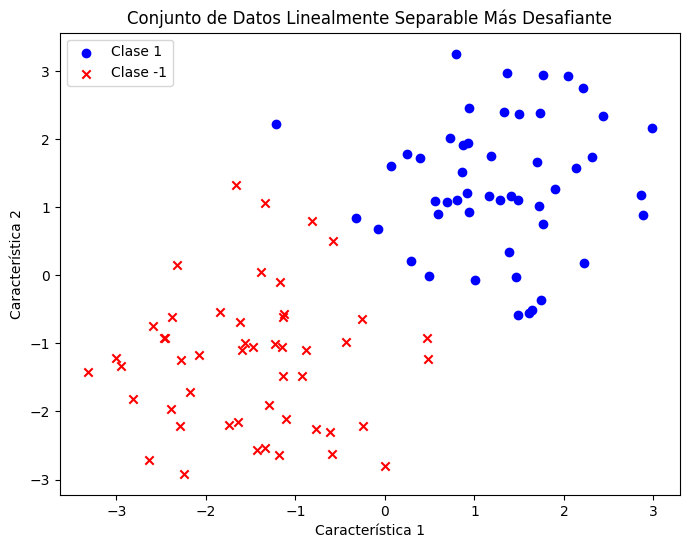

In [118]:
# Visualizamos el conjunto de datos
plt.figure(figsize=(8, 6))
plt.scatter(X_pos[:, 0], X_pos[:, 1], color='blue', marker='o', label='Clase 1')
plt.scatter(X_neg[:, 0], X_neg[:, 1], color='red', marker='x', label='Clase -1')
plt.title('Conjunto de Datos Linealmente Separable Más Desafiante')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend()
plt.show()

Implementation

In [119]:
def perceptron(X, y, learning_rate_func, epochs=100):
    X_bias = np.hstack((np.ones((X.shape[0], 1)), X))  # Add bias term
    weights = np.zeros(X_bias.shape[1])
    errors = []
    
    for epoch in range(1, epochs + 1):
        learning_rate = learning_rate_func(epoch)
        total_error = 0
        for xi, target in zip(X_bias, y):
            activation = np.dot(weights, xi)
            output = 1 if activation >= 0 else -1
            update = learning_rate * (target - output)
            weights += update * xi
            total_error += int(update != 0.0)
        errors.append(total_error)
        if total_error == 0:
            break  # Early stopping
    return weights, errors

Train

In [120]:
def constant_lr(lr):
    return lambda epoch: lr

def decreasing_lr(initial_lr):
    return lambda epoch: initial_lr / epoch 

def exponential_decay_lr(initial_lr, decay_rate):
    return lambda epoch: initial_lr * np.exp(-decay_rate * epoch)

learning_rate_functions = {
    'Constant LR=0.1': constant_lr(0.1),
    'Constant LR=0.01': constant_lr(0.01),
    'Decreasing LR': decreasing_lr(1.0)
}

weights_list = []
errors_list = []
labels_list = []

#for label, lr_func in learning_rate_functions.items():
#    weights, errors = perceptron_step(X, y, learning_rate_func=lr_func, epochs=100)
#    weights_list.append(weights)
#    errors_list.append(errors)
#    labels_list.append(label)

learning_rate = 0.1
weights, errors = perceptron(X, y, learning_rate_func=constant_lr(learning_rate), epochs=100)



Plot perceptron hyperplane

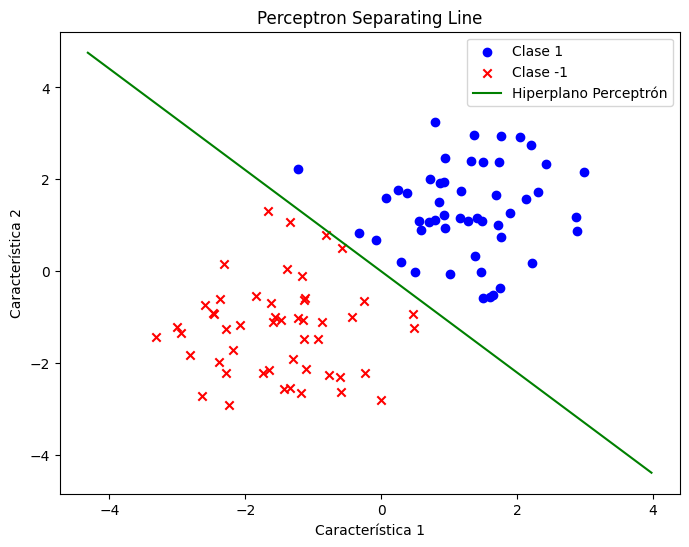

In [135]:
def plot_step1(X, y, weights, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Clase 1')
    plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='red', marker='x', label='Clase -1')
    
    # Plot the perceptron line
    x_vals = np.linspace(np.min(X[:, 0])-1, np.max(X[:, 0])+1, 100)
    y_vals = -(weights[1]*x_vals + weights[0])/weights[2]
    plt.plot(x_vals, y_vals, 'g-', label='Hiperplano Perceptrón')
    
    plt.title(title)
    plt.xlabel('Característica 1')
    plt.ylabel('Característica 2')
    plt.legend()
    plt.show()

plot_step1(X, y, weights, 'Perceptron Separating Line')



Choose Two Points from One Class and Create a Line Through Them

In [122]:
def distance_to_line(X, weights):
    # X is without bias term
    numerator = np.abs(weights[1]*X[:, 0] + weights[2]*X[:, 1] + weights[0])
    denominator = np.sqrt(weights[1]**2 + weights[2]**2)
    return numerator / denominator

# Get positive class points
X_pos = X[y == 1]
distances_pos = distance_to_line(X_pos, weights)

# Find indices of the two closest points
closest_pos_indices = np.argsort(distances_pos)[:2]
closest_pos_points = X_pos[closest_pos_indices]


Plot perceptron hyperplane + 2 points

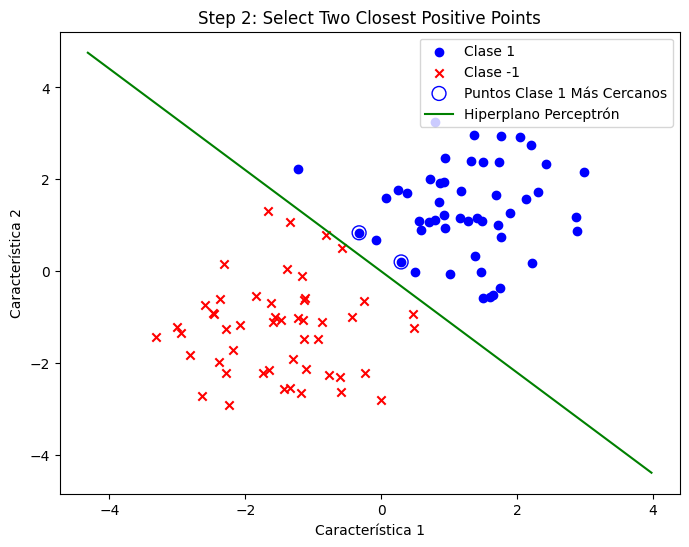

In [137]:
def plot_step2(X, y, weights, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Clase 1')
    plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='red', marker='x', label='Clase -1')
    plt.scatter(closest_pos_points[:, 0], closest_pos_points[:, 1], facecolors='none', edgecolors='blue', s=100, label='Puntos Clase 1 Más Cercanos')
    
    # Plot the perceptron line
    x_vals = np.linspace(np.min(X[:, 0])-1, np.max(X[:, 0])+1, 100)
    y_vals = -(weights[1]*x_vals + weights[0])/weights[2]
    plt.plot(x_vals, y_vals, 'g-', label='Hiperplano Perceptrón')
    
    plt.title(title)
    plt.xlabel('Característica 1')
    plt.ylabel('Característica 2')
    plt.legend()
    plt.show()
    
plot_step2(X, y, weights, 'Step 2: Select Two Closest Positive Points')

Create a line that passes through these two points

In [124]:
# Fit a line through the two points
# y = m1*x + b1

x_coords = closest_pos_points[:, 0]
y_coords = closest_pos_points[:, 1]

# Calculate slope (m1) and intercept (b1)
m1 = (y_coords[1] - y_coords[0]) / (x_coords[1] - x_coords[0])
b1 = y_coords[0] - m1 * x_coords[0]

# Alternatively, use np.polyfit
# m1, b1 = np.polyfit(x_coords, y_coords, 1)

# Line function
def line1(x):
    return m1 * x + b1

Plot this line

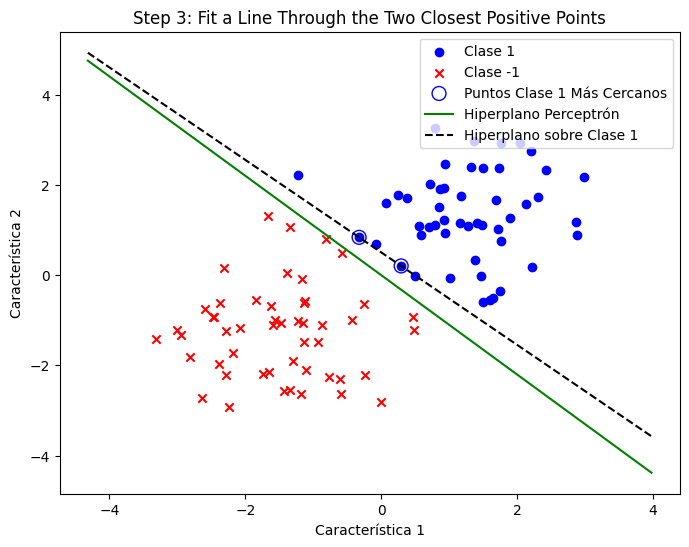

In [141]:
def plot_step3(X, y, weights, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Clase 1')
    plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='red', marker='x', label='Clase -1')
    plt.scatter(closest_pos_points[:, 0], closest_pos_points[:, 1], facecolors='none', edgecolors='blue', s=100, label='Puntos Clase 1 Más Cercanos')
    
    # Plot the perceptron line
    x_vals = np.linspace(np.min(X[:, 0])-1, np.max(X[:, 0])+1, 100)
    y_vals = -(weights[1]*x_vals + weights[0])/weights[2]
    plt.plot(x_vals, y_vals, 'g-', label='Hiperplano Perceptrón')
    # Plot the line through the two points
    plt.plot(x_vals, line1(x_vals), 'k--', label='Hiperplano sobre Clase 1')
    
    plt.title(title)
    plt.xlabel('Característica 1')
    plt.ylabel('Característica 2')
    plt.legend(loc='upper right')
    plt.show()
    
plot_step3(X, y, weights, 'Step 3: Fit a Line Through the Two Closest Positive Points')

Choose the Closest Point from the Other Class and Create a Parallel Line Passing Through It

In [126]:
# Get negative class points
X_neg = X[y == -1]
distances_neg = distance_to_line(X_neg, weights)

# Find the closest point
closest_neg_index = np.argmin(distances_neg)
closest_neg_point = X_neg[closest_neg_index]

Plot the closest negative point

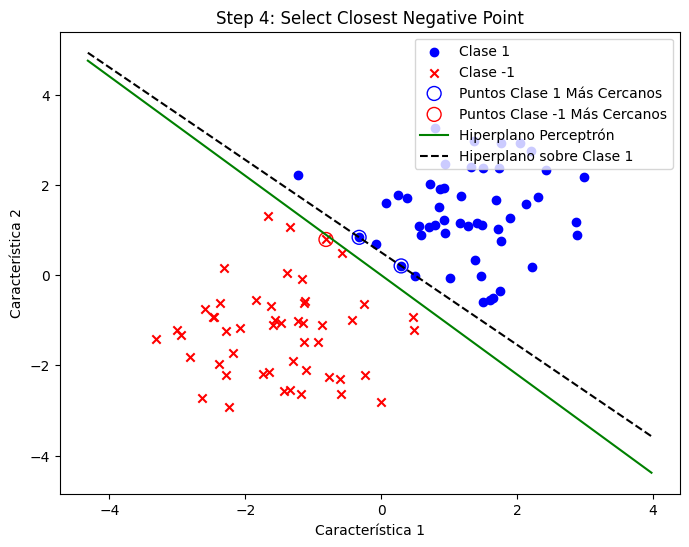

In [145]:
def plot_step4(X, y, weights, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Clase 1')
    plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='red', marker='x', label='Clase -1')
    plt.scatter(closest_pos_points[:, 0], closest_pos_points[:, 1], facecolors='none', edgecolors='blue', s=100, label='Puntos Clase 1 Más Cercanos')
    plt.scatter(closest_neg_point[0], closest_neg_point[1], facecolors='none', edgecolors='red', s=100, label='Puntos Clase -1 Más Cercanos')
    
    # Plot the perceptron line
    x_vals = np.linspace(np.min(X[:, 0])-1, np.max(X[:, 0])+1, 100)
    y_vals = -(weights[1]*x_vals + weights[0])/weights[2]
    plt.plot(x_vals, y_vals, 'g-', label='Hiperplano Perceptrón')
    # Plot the line through the two points
    plt.plot(x_vals, line1(x_vals), 'k--', label='Hiperplano sobre Clase 1')
    
    plt.title(title)
    plt.xlabel('Característica 1')
    plt.ylabel('Característica 2')
    plt.legend(loc='upper right')
    plt.show()
    
plot_step4(X, y, weights, 'Step 4: Select Closest Negative Point')

Create a line parallel to the line from Step 2 that passes through the closest negative point

In [128]:
# Calculate intercept b2 for the parallel line passing through the closest negative point
b2 = closest_neg_point[1] - m1 * closest_neg_point[0]

# Line function
def line2(x):
    return m1 * x + b2

Plot this line

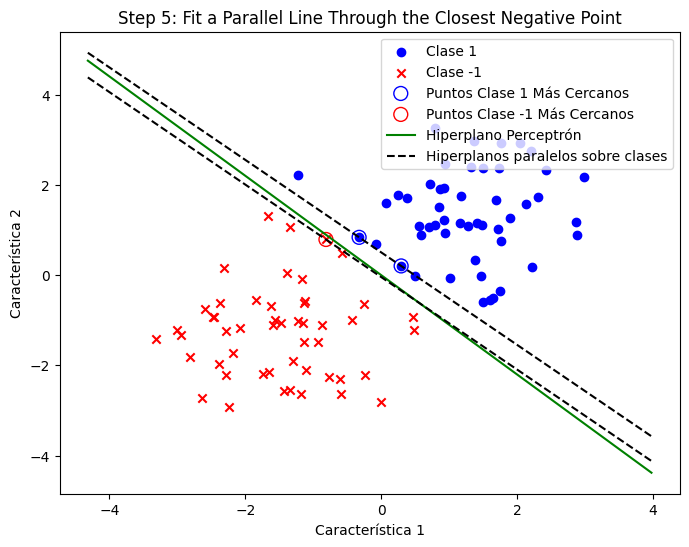

In [144]:
def plot_step5(X, y, weights, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Clase 1')
    plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='red', marker='x', label='Clase -1')
    plt.scatter(closest_pos_points[:, 0], closest_pos_points[:, 1], facecolors='none', edgecolors='blue', s=100, label='Puntos Clase 1 Más Cercanos')
    plt.scatter(closest_neg_point[0], closest_neg_point[1], facecolors='none', edgecolors='red', s=100, label='Puntos Clase -1 Más Cercanos')
    
    # Plot the perceptron line
    x_vals = np.linspace(np.min(X[:, 0])-1, np.max(X[:, 0])+1, 100)
    y_vals = -(weights[1]*x_vals + weights[0])/weights[2]
    plt.plot(x_vals, y_vals, 'g-', label='Hiperplano Perceptrón')
    # Plot the line through the two points
    plt.plot(x_vals, line1(x_vals), 'k--', label='Hiperplanos paralelos sobre clases')
    # Plot parallel line through closest negative point
    plt.plot(x_vals, line2(x_vals), 'k--')
    
    plt.title(title)
    plt.xlabel('Característica 1')
    plt.ylabel('Característica 2')
    plt.legend(loc='upper right')
    plt.show()
    
plot_step5(X, y, weights, 'Step 5: Fit a Parallel Line Through the Closest Negative Point')

Create a New Line Parallel to the Previous Lines and Place It Midway Between Them

In [130]:
line_distance = np.abs(b2 - b1) / np.sqrt(1 + m1**2)
b_mid = (b1 + b2) / 2

def line_mid(x):
    return m1 * x + b_mid

Plot the midway line:

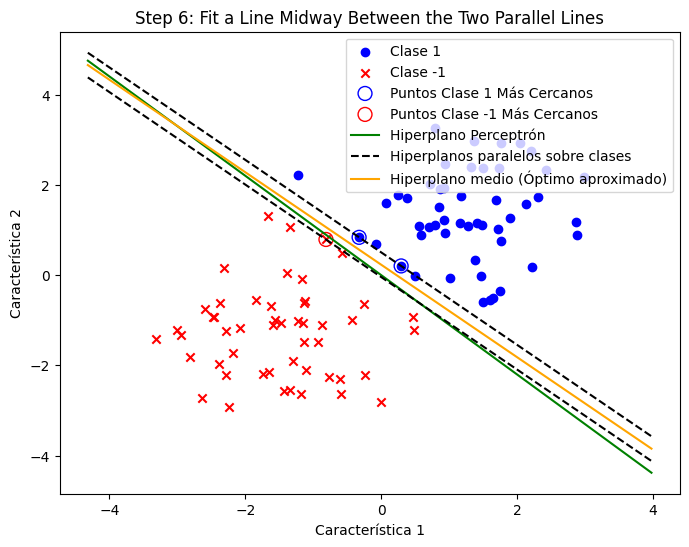

In [146]:
def plot_step6(X, y, weights, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Clase 1')
    plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='red', marker='x', label='Clase -1')
    plt.scatter(closest_pos_points[:, 0], closest_pos_points[:, 1], facecolors='none', edgecolors='blue', s=100, label='Puntos Clase 1 Más Cercanos')
    plt.scatter(closest_neg_point[0], closest_neg_point[1], facecolors='none', edgecolors='red', s=100, label='Puntos Clase -1 Más Cercanos')
    
    # Plot the perceptron line
    x_vals = np.linspace(np.min(X[:, 0])-1, np.max(X[:, 0])+1, 100)
    y_vals = -(weights[1]*x_vals + weights[0])/weights[2]
    plt.plot(x_vals, y_vals, 'g-', label='Hiperplano Perceptrón')
    # Plot the line through the two points
    plt.plot(x_vals, line1(x_vals), 'k--', label='Hiperplanos paralelos sobre clases')
    # Plot parallel line through closest negative point
    plt.plot(x_vals, line2(x_vals), 'k--')
    # Plot midway line
    plt.plot(x_vals, line_mid(x_vals), 'orange', label='Hiperplano medio (Óptimo aproximado)')
    
    plt.title(title)
    plt.xlabel('Característica 1')
    plt.ylabel('Característica 2')
    plt.legend(loc='upper right')
    plt.show()
    
plot_step6(X, y, weights, 'Step 6: Fit a Line Midway Between the Two Parallel Lines')

Compare with the Optimal Hyperplane from SVM

In [132]:
from sklearn import svm

# Fit SVM with linear kernel
clf = svm.SVC(kernel='linear', C=1e5)
clf.fit(X, y)

# Get the coefficients (w1, w2) and intercept (b)
w_svm = clf.coef_[0]
b_svm = clf.intercept_[0]

# SVM decision boundary
def svm_line(x):
    return (-w_svm[0]*x - b_svm)/w_svm[1]

Plot all the lines together:

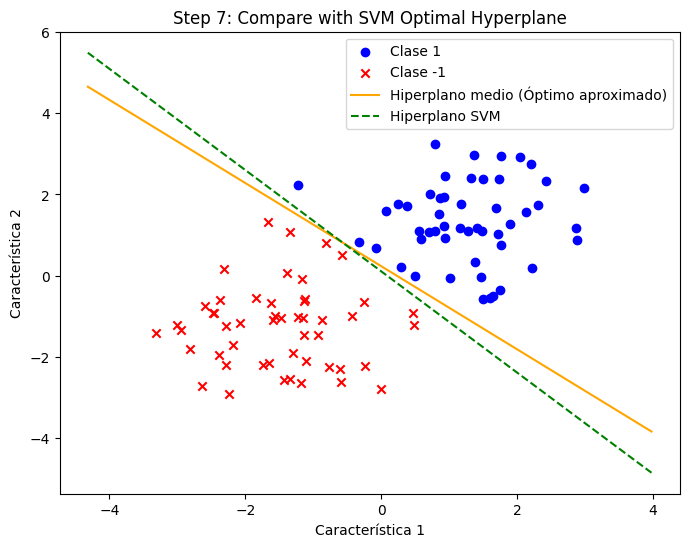

In [150]:
def plot_step7(X, y, weights, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Clase 1')
    plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='red', marker='x', label='Clase -1')

    # Plot the perceptron line
    x_vals = np.linspace(np.min(X[:, 0])-1, np.max(X[:, 0])+1, 100)
    y_vals = -(weights[1]*x_vals + weights[0])/weights[2]
    # Plot midway line
    plt.plot(x_vals, line_mid(x_vals), 'orange', label='Hiperplano medio (Óptimo aproximado)')
    # Plot SVM line
    plt.plot(x_vals, svm_line(x_vals), 'g--', label='Hiperplano SVM')
    
    plt.title(title)
    plt.xlabel('Característica 1')
    plt.ylabel('Característica 2')
    plt.legend(loc='upper right')
    plt.show()
    
plot_step7(X, y, weights, 'Step 7: Compare with SVM Optimal Hyperplane')